In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

C:\Users\nmims.student\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("C:\Shieulidata\Bank_Customer_Churn_Prediction.csv",sep=",", header=0)
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
missing_values = df.isnull().sum()
duplicated = df.duplicated().sum()
data_types = df.dtypes
unique_values = df.nunique()

columns = pd.DataFrame({
    "missing_values ":missing_values,
    "duplicated ":duplicated,
    "data_types ":data_types,
    "unique_values ":unique_values
    
})

columns

,missing_values,duplicated,data_types,unique_values
customer_id,0,0,int64,10000
credit_score,0,0,int64,460
country,0,0,object,3
gender,0,0,object,2
age,0,0,int64,70
tenure,0,0,int64,11
balance,0,0,float64,6382
products_number,0,0,int64,4
credit_card,0,0,int64,2
active_member,0,0,int64,2


In [4]:
male_churned = df.query("gender == 'Male' and churn == 1")
male_non_churned = df.query("gender == 'Male' and churn == 0")
female_churned = df.query("gender == 'Female' and churn == 1")
female_non_churned = df.query("gender == 'Female' and churn == 0")

In [5]:
male_churn_rate = len(male_churned) / len(df.query("gender == 'Male'"))
female_churn_rate = len(female_churned) / len(df.query("gender == 'Female'"))

print("Churn Rate - Male:", male_churn_rate)
print("Churn Rate - Female:", female_churn_rate)



Churn Rate - Male: 0.16455928165658787
Churn Rate - Female: 0.2507153863086066


In [6]:
df_new = pd.get_dummies(df['country'])
df1 = pd.concat([df, df_new], axis=1)

In [7]:
df1.drop(columns=['country'],inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df1['gender'] = encoder.fit_transform(df['gender'])

In [9]:
df1

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany,Spain
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,1,39,5,0.00,2,1,0,96270.64,0,True,False,False
9996,15569892,516,1,35,10,57369.61,1,1,1,101699.77,0,True,False,False
9997,15584532,709,0,36,7,0.00,1,0,1,42085.58,1,True,False,False
9998,15682355,772,1,42,3,75075.31,2,1,0,92888.52,1,False,True,False


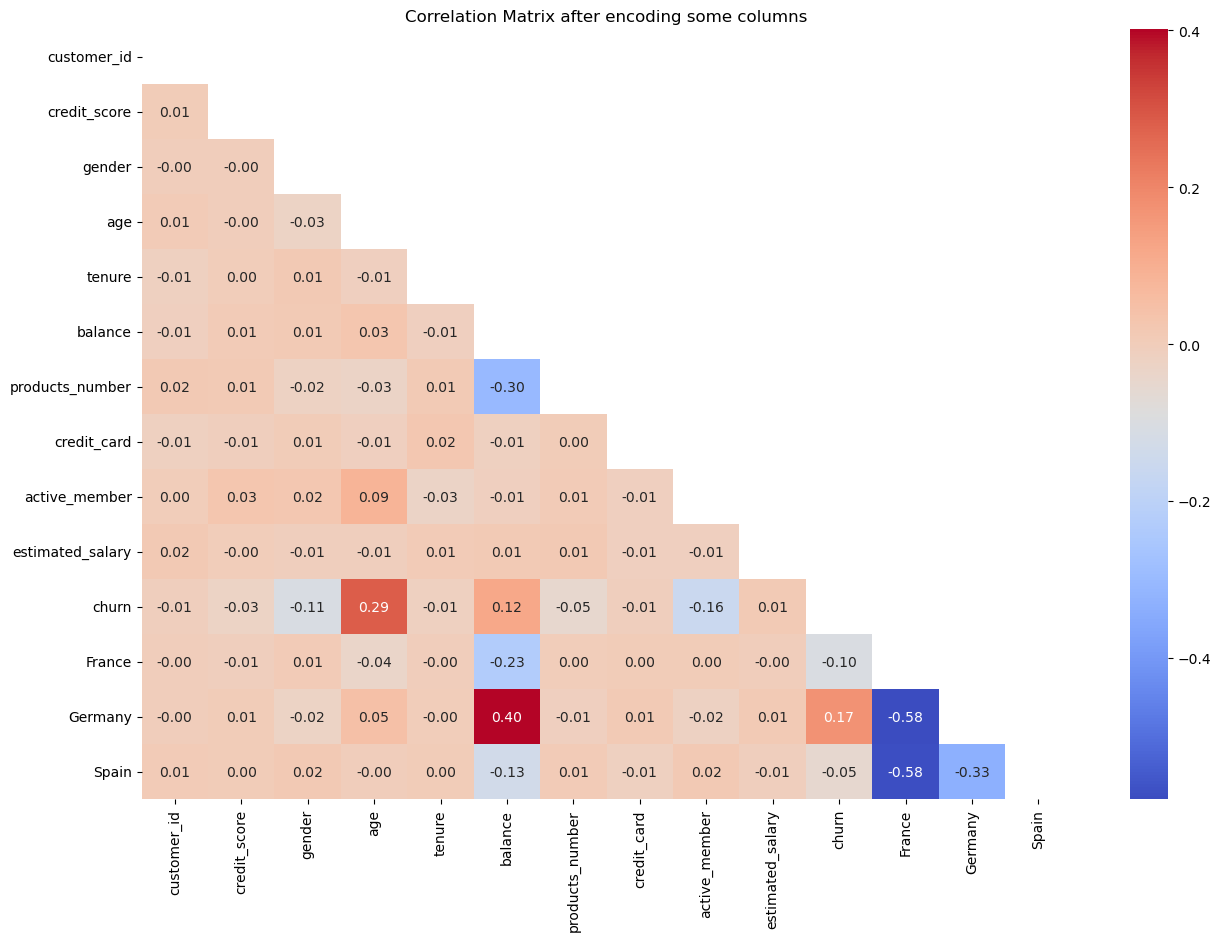

In [10]:
corr_matrix = df1.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True,
           fmt=".2f", cbar=True)
plt.title('Correlation Matrix after encoding some columns')
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols = ['credit_score','balance','estimated_salary']

df1[cols] = scaler.fit_transform(df1[cols])

In [13]:
df1.drop(columns=['customer_id','age'],inplace=True)

In [14]:
df1.columns

Index(['credit_score', 'gender', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'churn', 'France',
       'Germany', 'Spain'],
      dtype='object')

In [15]:
print(df1.dtypes)

credit_score        float64
gender                int32
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
France                 bool
Germany                bool
Spain                  bool
dtype: object


In [16]:
preprocessed_df=df1.copy()

In [18]:
preprocessed_df[preprocessed_df.select_dtypes(include='bool').columns]=preprocessed_df.select_dtypes(include='bool')*1

In [19]:
print(preprocessed_df.dtypes)

credit_score        float64
gender                int32
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
France                int32
Germany               int32
Spain                 int32
dtype: object


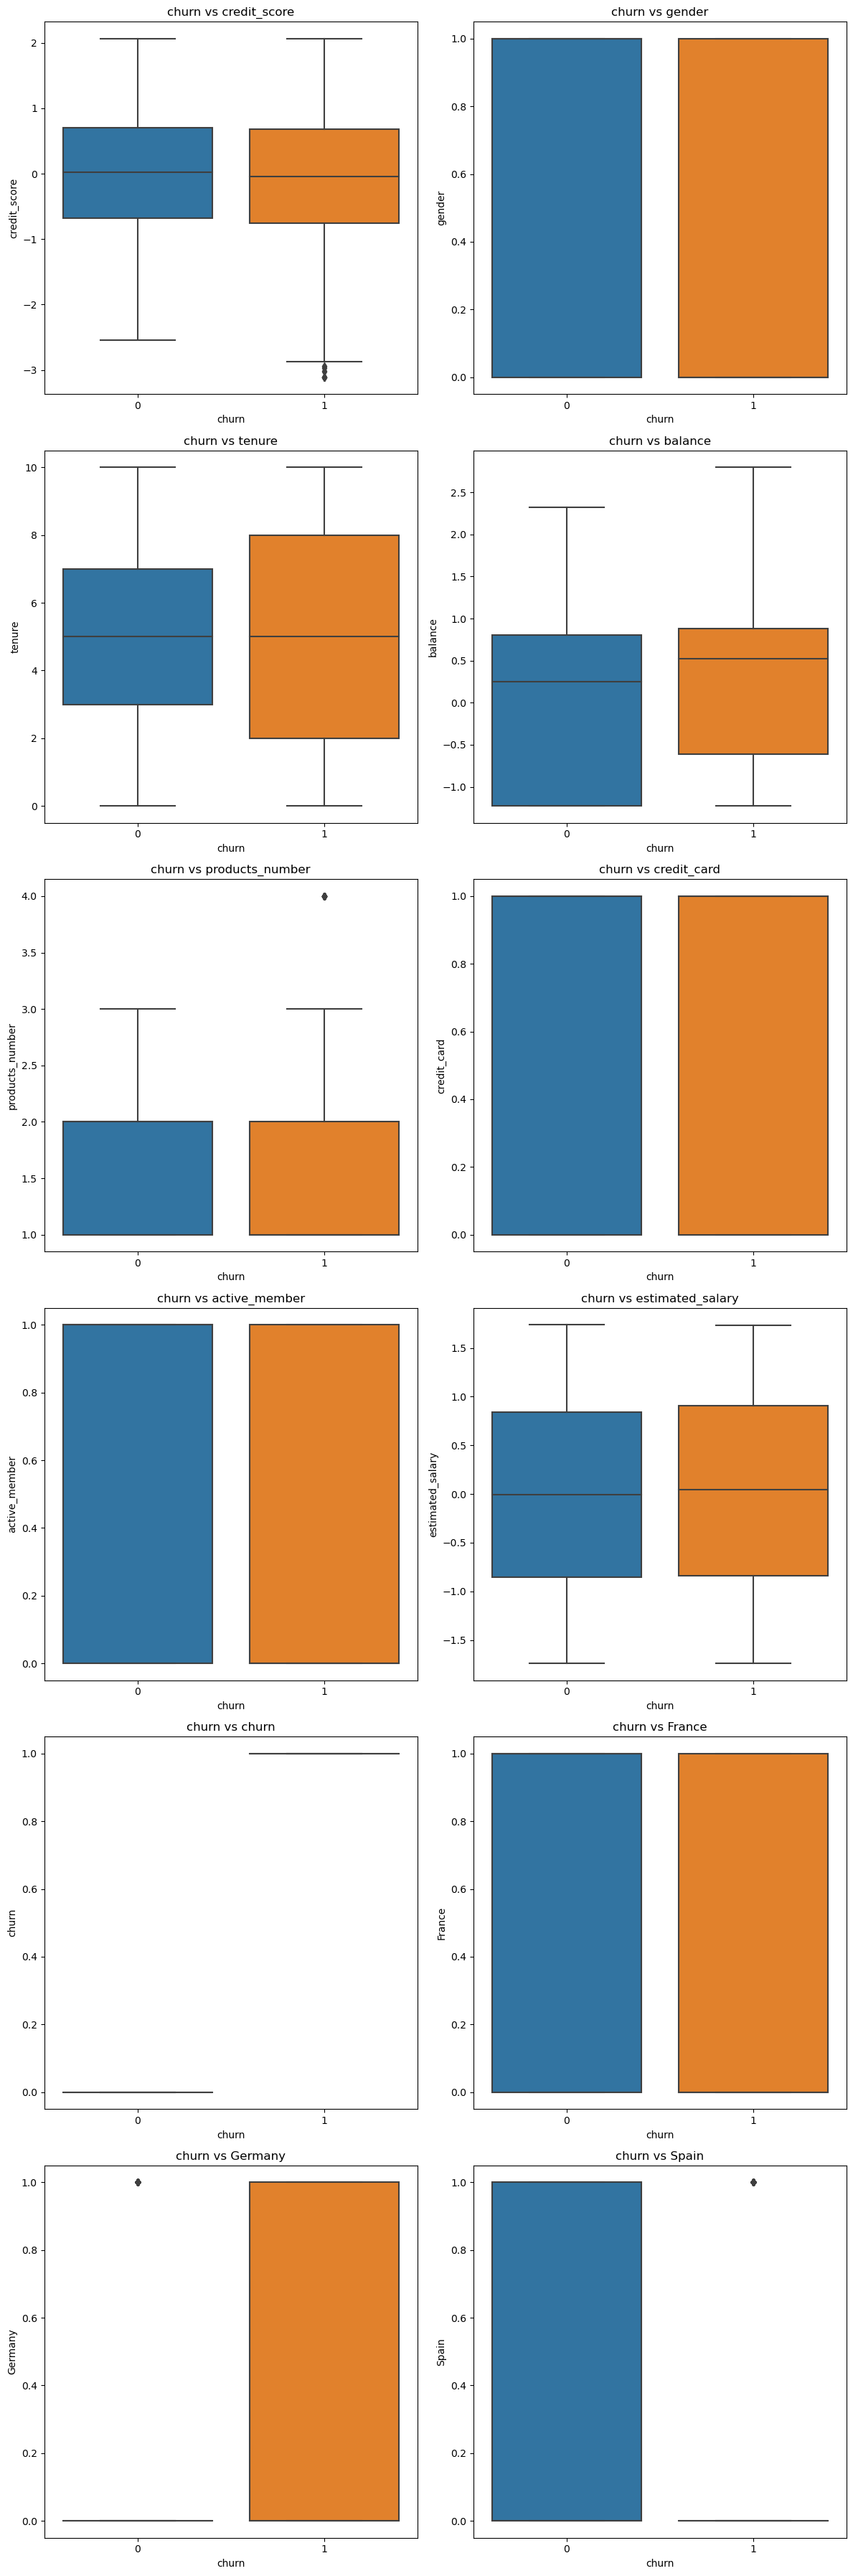

In [20]:
num_columns = preprocessed_df.shape[1]
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows*6))
axes = axes.flatten()

for i, column in enumerate(preprocessed_df.columns):
    ax = axes[i]
    sns.boxplot(x=preprocessed_df['churn'], y=preprocessed_df[column],
               ax=ax)
    ax.set_title(f'churn vs {column}')
    
plt.tight_layout()
plt.show()

In [21]:
x = preprocessed_df.drop(columns=['churn'])
y = preprocessed_df['churn']

print(x.shape)
print(y.shape)

(10000, 11)
(10000,)


In [22]:
from sklearn.model_selection import train_test_split

x_train ,x_test , y_train , y_test = train_test_split(x , y, 
                                                     test_size=0.2,random_state=42)
x_train_tensor = torch.tensor(x_train.values)
x_test_tensor = torch.tensor(x_test.values)
y_train_tensor = torch.tensor(y_train.values)
y_test_tensor = torch.tensor(y_test.values)

print(x_train_tensor.shape)
print(x_test_tensor.shape)

print(y_train_tensor.shape)
print(y_test_tensor.shape)
print(x_train_tensor.dtype)

torch.Size([8000, 11])
torch.Size([2000, 11])
torch.Size([8000])
torch.Size([2000])
torch.float64


In [25]:
class Ann(nn.Module):
    def __init__(self, input_size=11, hidden1=32, hidden2=16, hidden3=8, output=2):
        super(Ann, self).__init__()
        self.f1 = nn.Linear(input_size, hidden1)
        self.f2 = nn.Linear(hidden1, hidden2)
        self.f3 = nn.Linear(hidden2, hidden3)
        self.output = nn.Linear(hidden3, output)
        
    def forward(self, x):
        x = F.relu(self.f1(x))
        x = F.relu(self.f2(x))
        x = F.relu(self.f3(x))
        x = self.output(x)
        return x

In [26]:
model = Ann(input_size=11, hidden1=32, hidden2=16, hidden3=8, output=2)

In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [29]:
epochs = range(1000, 3000)
final_loss = []

for i in epochs:
    x_train_tensor = x_train_tensor.float()
    y_pred = model(x_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    final_loss.append(loss.item())
    
    if i % 10 == 0:
        print("Epoch number: {} and the loss: {}".format(i, loss.item()))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

Epoch number: 1000 and the loss: 0.5881882309913635
Epoch number: 1010 and the loss: 0.5838080048561096
Epoch number: 1020 and the loss: 0.5795029401779175
Epoch number: 1030 and the loss: 0.5752798914909363
Epoch number: 1040 and the loss: 0.5711520910263062
Epoch number: 1050 and the loss: 0.5671235918998718
Epoch number: 1060 and the loss: 0.563204824924469
Epoch number: 1070 and the loss: 0.5594032406806946
Epoch number: 1080 and the loss: 0.5557389259338379
Epoch number: 1090 and the loss: 0.5522024631500244
Epoch number: 1100 and the loss: 0.5488007068634033
Epoch number: 1110 and the loss: 0.5455361604690552
Epoch number: 1120 and the loss: 0.5424120426177979
Epoch number: 1130 and the loss: 0.5394265055656433
Epoch number: 1140 and the loss: 0.5365887880325317
Epoch number: 1150 and the loss: 0.533896267414093
Epoch number: 1160 and the loss: 0.5313466191291809
Epoch number: 1170 and the loss: 0.528942346572876
Epoch number: 1180 and the loss: 0.5266858339309692
Epoch number: 1

In [30]:
predictions = []
with torch.no_grad():
    x_test_tensor = x_test_tensor.float()
    for data in x_test_tensor:
        y_pred = model.forward(data)
        predicted_class = torch.argmax(y_pred).item()
        predictions.append(predicted_class)
        
predictions[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_tensor,predictions)
cm

array([[1607,    0],
       [ 393,    0]], dtype=int64)

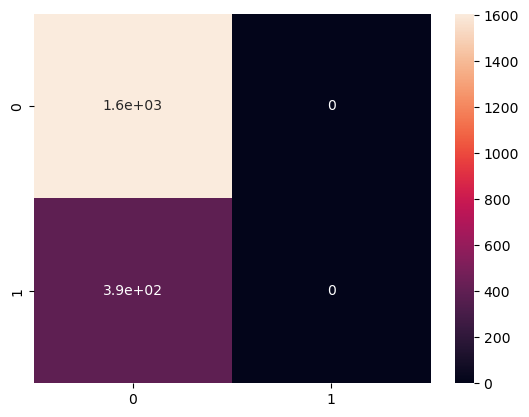

In [34]:
sns.heatmap(cm,annot=True)
plt.show()

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_tensor, predictions)

0.8035

In [36]:
from sklearn.metrics import classification_report
report = classification_report(y_test_tensor, predictions)

print(report)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
